In [40]:
import numpy as np
import matplotlib.pyplot as plt

# get some exapmle locations and properties

In [41]:

x = np.array([[0.0,0.0],[0.0,1.0],[1.0,0.0],[0.5,0.5]])
prop = np.array([1.0,2.0,3.0,4.0]) # some value, i.e .one of the l measures

Text(0.5, 1.0, 'cell locations and property values')

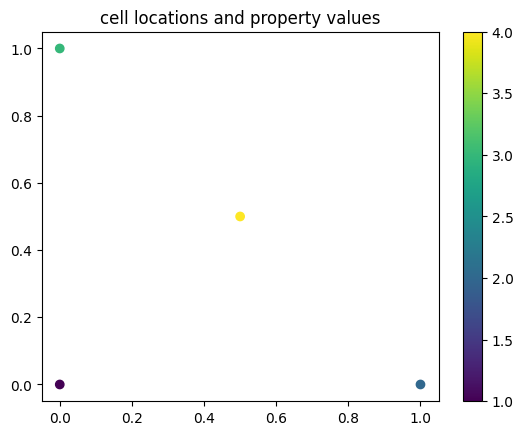

In [73]:
fig,ax = plt.subplots()
h = ax.scatter(x[:,1],x[:,0],c=prop)
plt.colorbar(h)
ax.set_title('cell locations and property values')
# note here, when storing data I always use row col instead of xy
# when plotting I reverse row col to xy, i.e. we plot col for x and row for y

# step 1, define a voxel grid

In [43]:
x0 = np.arange(-0.5,1.5,0.1)
x1 = np.arange(-0.5,1.5,0.1)
X = np.stack(np.meshgrid(x0,x1,indexing='ij'),-1) # I always use 

In [44]:
X[4,5] # the position it returns is in "row column" order, not in "xy" order (because I use ij)

array([-1.00000000e-01, -1.11022302e-16])

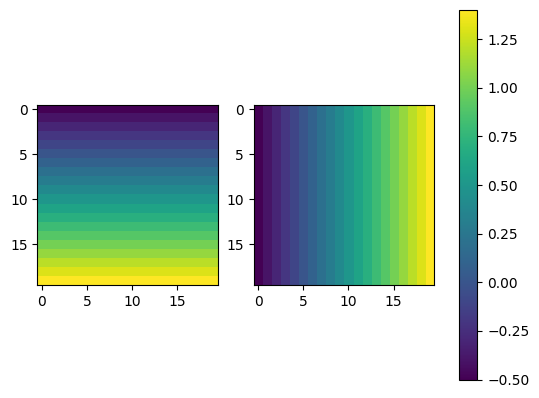

In [45]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(X[...,0])
h = ax[1].imshow(X[...,1])
plt.colorbar(h,ax=ax)

# estimate local density

In [90]:
density = np.zeros_like(X[...,0])
sigma = 0.4
for xi in x:
    density += np.exp(  np.sum(-(X - xi)**2/2/sigma**2, -1 ) )/np.sqrt(2.0*np.pi*sigma**2)**2

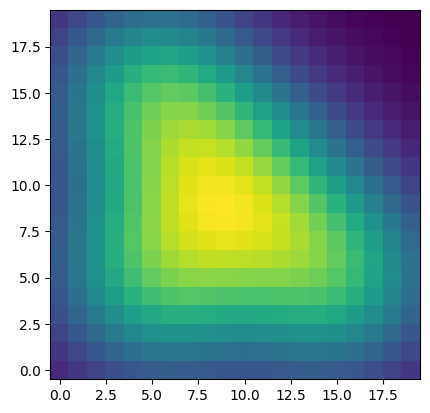

In [91]:
fig,ax = plt.subplots()
ax.imshow(density)
# note that the y axis is flipped by default, relative to what we sa
ax.invert_yaxis()

# estimate local averages

In [92]:
local_avg = np.zeros_like(X[...,0])
for xi,pi in zip(x,prop):
    local_avg += np.exp(  np.sum(-(X - xi)**2/2/sigma**2, -1 ) )/np.sqrt(2.0*np.pi*sigma**2)**2 * pi

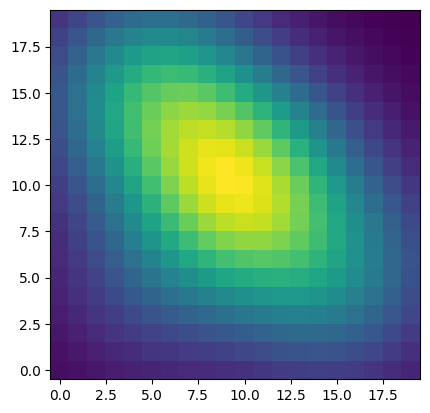

In [93]:
fig,ax = plt.subplots()
ax.imshow(local_avg)
ax.invert_yaxis()

In [94]:
# the above is a sum, not an average
# and density and the value of ht eproperty are coupled.
# i.e. if hte signal is bright this could be due to 2 reasons
# either there are a lot of cells here, or the property is large here

In [95]:
local_avg = local_avg / density

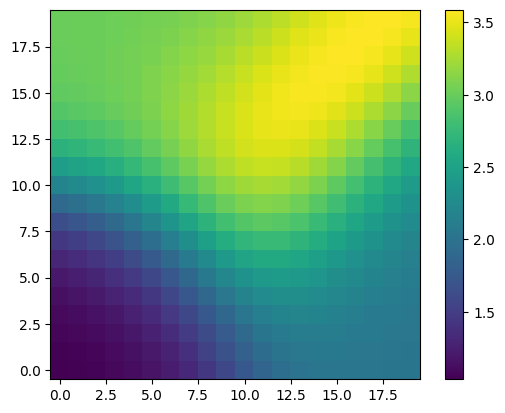

In [96]:
fig,ax = plt.subplots()
h = ax.imshow(local_avg)
fig.colorbar(h)
ax.invert_yaxis()

# render with transparency

In [97]:
cm = plt.cm.inferno
RGBA = cm(local_avg/np.max(local_avg))

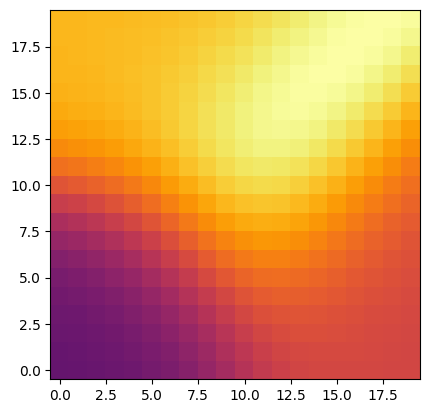

In [98]:
fig,ax = plt.subplots()
ax.imshow(RGBA)
ax.invert_yaxis()

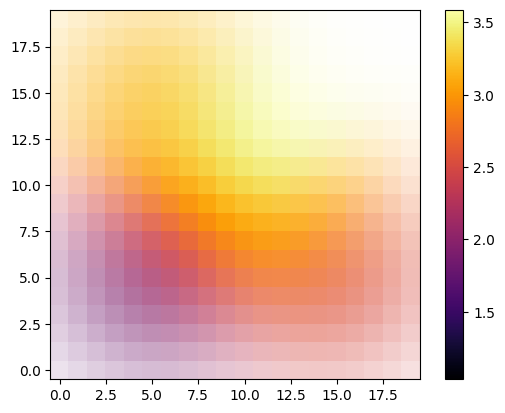

In [99]:
RGBA[...,-1] = density/np.max(density)
fig,ax = plt.subplots()
h = ax.imshow(RGBA,cmap=cm,vmin=np.min(local_avg),vmax=np.max(local_avg)) # extra arguments are for making a colorbar
ax.invert_yaxis()
# we need a colorbar
fig.colorbar(h)

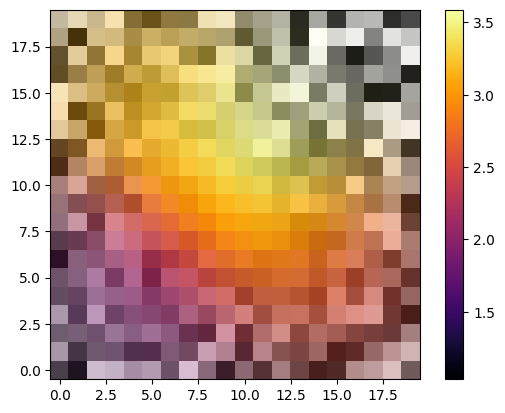

In [101]:
# now we have a signal near the cells, and it is transparent far from the cells
# because it is transparent far from the cells, we can put this on top of another image (like the atlas)
fig,ax = plt.subplots()
ax.imshow(np.random.rand(*RGBA[...,0].shape)*0.5,cmap='gray')
# instea of drawing random numbers, we will want to draw the atlas
h = ax.imshow(RGBA,cmap=cm,vmin=np.min(local_avg),vmax=np.max(local_avg)) # extra arguments are for making a colorbar
ax.invert_yaxis()
# we need a colorbar
fig.colorbar(h)

# todo
Start with a 2D example (i.e. just ignore one of the xyz components) and reproduce what I've done with real cells.

Then, do this in 3D, and figure out how to visualize it in 3D.  The easiest way is to produce the whole 3D image, and then show a sequence of slices.

You will probably get 0 divided by 0 errors.  You'll have to set these to some other value instead of nan.